<a href="https://colab.research.google.com/github/yyaallpp-naver-com/1-/blob/main/03-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## k-최근접 이웃 회귀



### 최근접 이웃 분류 vs 최근접 이웃 회귀

* 최근접 이웃 분류 : 주변 샘플들의 클래스를 토대로 다수의 클래스를 새로운 샘플의 클래스로 예측
* 최근접 이웃 회귀 : 주변 샘플들의 수치를 토대로 수치들의 평균을 새로운 샘플의 타깃값을 예측



### 훈련 데이터 준비

In [172]:
import numpy as np      # 바로 넘파이 배열로 변환

# 농어의 길이(특성)
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

# 농어의 무게(타깃) -> 찾고자 하는 값
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 훈련 데이터의 형태 파악을 위한 산점도

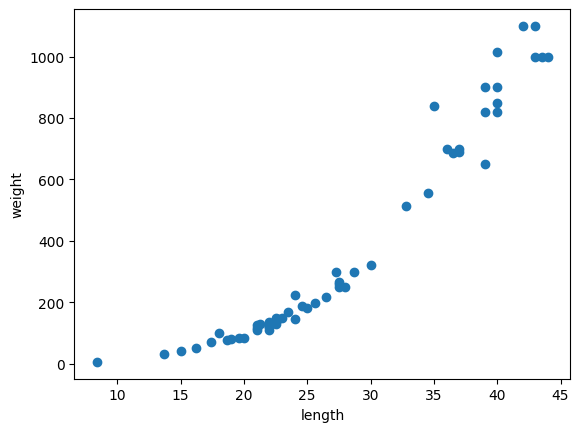

In [173]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)     # 농어의 길이와 무게에 대한 정보를 담고 있음
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 머신러닝 모델에 사용하기 위해 훈련 세트와 테스트 세트로 분류

In [174]:
from sklearn.model_selection import train_test_split
                                                                                        # 책과 같은 결과를 얻기 위해서 random_state 사용
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
  # perch_length(input)     perch_weight(target)

In [175]:
print("훈련 세트의 입력값: ", train_input)
print("훈련 세트의 타깃값: ",  train_target)
print("테스트 세트의 입력값: ", test_input)
print("테스트 세트의 타깃값: ", test_target)

훈련 세트의 입력값:  [19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
훈련 세트의 타깃값:  [  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
테스트 세트의 입력값:  [ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
테스트 세트의 타깃값:  [   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [176]:
print(train_input.shape)          # train_test_split 이용 시 25%가 테스트 세트가 됨
print(test_input.shape)

(42,)
(14,)


### 1차원 배열 -> 2차원 배열
위의 결과값이 1차원 배열 <br>
=> 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다! <br>
따라서 1차원 배열을 <strong>2차원 배열</strong>로 바꿔야 함!

#### ex) (4, ) 배열을 (2, 2) 크기로 만들기

In [177]:
ex_array = np.array([1, 2, 3, 4])    # (4, )배열의 예시로 [1, 2, 3, 4]를 가져 옴
print(ex_array.shape)

ex1_array = ex_array.reshape(2, 2)
print(ex1_array, ex1_array.shape)    # reshape를 적용해서 바꾸기

(4,)
[[1 2]
 [3 4]] (2, 2)


#### reshape() 메서드로 배열의 크기 변경하기

In [178]:
train_input = train_input.reshape(-1, 1)         # -1: 가진 원소값 그대로, 1: 하나의 열
test_input = test_input.reshape(-1, 1)           # => 원소값은 같은 상태로 열이 하나인 2차원 배열

print(train_input)                # 원소의 크기는 변하지 않고 형태만 변환
print(test_input)

print(train_input.shape, test_input.shape)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]
(42, 1) (14, 1)


## k-최근접 이웃 회귀 알고리즘 사용하기

In [179]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()      # 객체를 생성


knr.fit(train_input, train_target)       # fit을 이용해 k-최근접 이웃 회귀 모델을 훈련

print(knr.score(test_input, test_target))   # score를 이용한 테스트 점수

0.992809406101064


### 테스트 점수의 의미?

분류에서의 score 값 => 샘플을 정확하게 분류한 개수의 비율<br>
회귀에서의 score 값 => **결정계수** or **R^2**<br>




### 타깃과 예측한 값 사이의 차이 구하기

In [180]:
from sklearn.metrics import mean_absolute_error       # 타깃과 예측의 절댓값 오차를 평균하여 반환하는 mean_absolute_error 불러오기

test_prediction = knr.predict(test_input)             # 테스트 세트에 대한 예측

mae = mean_absolute_error(test_target, test_prediction)    # 테스트 세트에 대한 평균 절댓값 오차 계산

print(test_target)          # 테스트 세트의 타깃값
print(test_prediction)      # 모델이 예측한 값


print(mae)      # 예측이 평균적으로 타깃값과 19g 정도 다르다는 것을 알 수 있음

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]
[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
19.157142857142862


### score() 에 훈련 세트를 전달해 점수 출력해보기

In [181]:
print(knr.score(train_input, train_target))   # score()에 훈련 세트 전달한 값 = 훈련 세트의 R^2

#  0.992809406101064                            테스트 세트의 R^2

0.9698823289099254


## 과대적합 vs 과소적합

#### **과대적합**
 *   훈련 세트에서는 점수가 좋았지만 테스트 세트에서는 점수가 
굉장히 나쁜 경우 <br>
 => 훈련 세트에만 잘 맞는 모델이기 때문에 테스트 세트나 실전에 적용하기 힘듬.



#### **과소적합**
* 훈련 세트보다 테스트 세트의 점수가 높은 경우
* 훈련 세트, 테스트 세트 두 점수 모두 너무 낮은 경우 <br>
=> 모델이 너무 단순해 훈련 세트를 통해 적절히 훈련되지 않음.

### k-최근접 이웃 알고리즘에서 모델을 더 복잡하게 만들기

In [182]:
knr.n_neighbors = 3         # 이웃의 개수를 줄이면 훈련 세트의 국지적인 패턴에 민감해지기 때문에 모델이 더 복잡해짐.

knr.fit(train_input, train_target)         # fit을 통해 모델을 다시 훈련
print(knr.score(train_input, train_target))     # 훈련 세트의 R^2

0.9804899950518966


In [183]:
print(knr.score(test_input, test_target))       # 테스트 세트의 R^2

0.9746459963987609


## 복잡한 모델 vs 단순한 모델

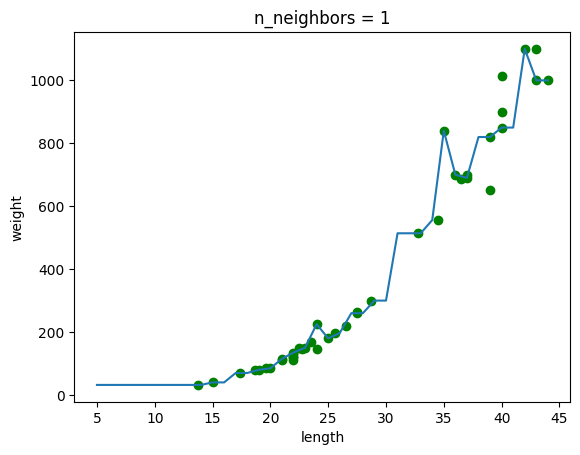

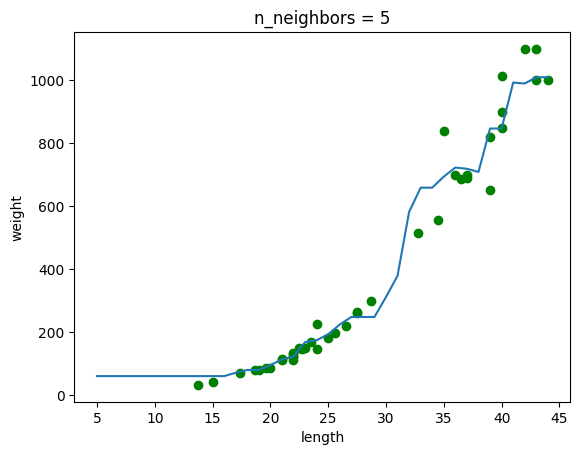

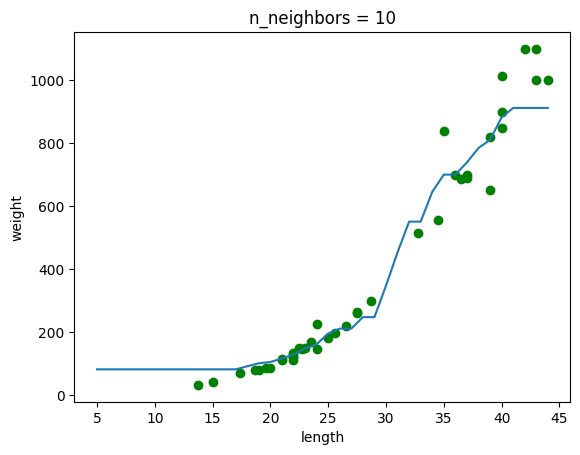

In [184]:
knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10] :
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target, color='green')     # 모델을 훈련시킨 데이터에 대한 값()
  plt.plot(x, prediction)         # x 값에 따라 학습된 모델에 따른 무게의 예측 값에 대한 그래프
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

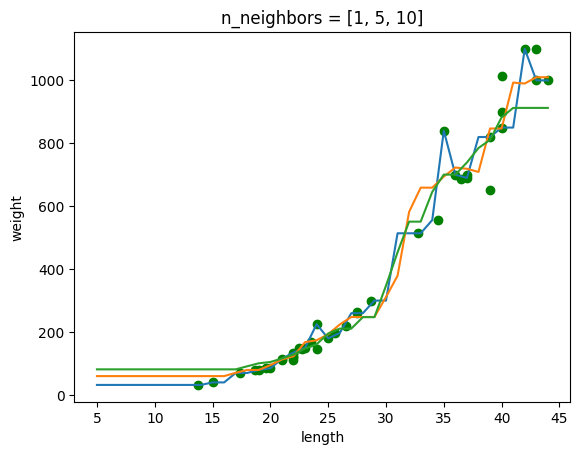

In [185]:
x = np.arange(5, 45).reshape(-1, 1)

knr1 = KNeighborsRegressor()        # 이웃한 샘플 1개만 봤을 때(파랑)
knr1.n_neighbors = 1
knr1.fit(train_input, train_target)
prediction1 = knr1.predict(x)
  
knr5 = KNeighborsRegressor()        # 이웃한 샘플 5개를 봤을 때(주황)
knr5.n_neighbors = 5
knr5.fit(train_input, train_target)
prediction5 = knr5.predict(x)

knr10 = KNeighborsRegressor()       # 이웃한 샘플 10개를 봤을 때(초록)
knr10.n_neighbors = 10
knr10.fit(train_input, train_target)
prediction10 = knr10.predict(x)
     
  
plt.scatter(train_input, train_target, color='green')     
plt.plot(x, prediction1, x, prediction5, x, prediction10)   # 파랑 - 1 주황 - 5 초록 - 10
plt.title('n_neighbors = [1, 5, 10]')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


## sklearn.neighbors.KNeighborsRegressor의 Parameters로 오는 값

* n_neighbors : 숫자, 기본값 = 5
  <br> => 참고할 이웃의 수
* weights : {'uniform', 'distance'}, 기본값 = 'uniform'
  <br> => distance : 거리에 따라 가중치를 둔다 / uniform : 단순한 평균 사용
  

---


* algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, 기본값 = 'auto'
* leaf_size : 숫자, 기본값 = 30
* p : 숫자, 기본값 = 2
* metric : str or callable, 기본값 = ’minkowski’
* metric_params : dict, 기본값 = None
* n_jobs : 숫자, 기본값 = None

### weights를 변경해보기

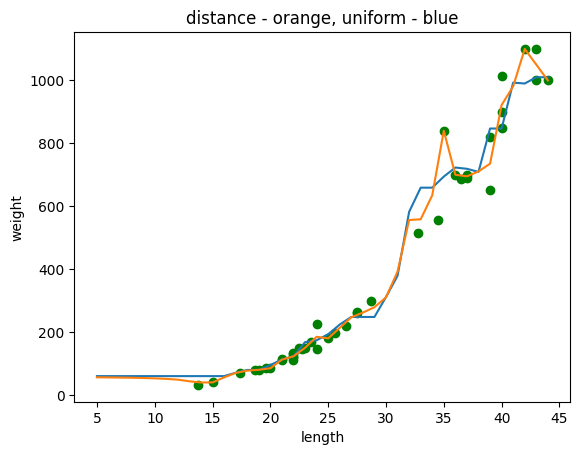

In [186]:
knr5 = KNeighborsRegressor()       # 기본값 : 파랑
knr5.n_neighbors = 5
knr5.fit(train_input, train_target)
prediction5 = knr5.predict(x)

knr6 = KNeighborsRegressor()     # distance 사용 : 주황
knr6.n_neighbors = 5
knr6.weights = 'distance'
knr6.fit(train_input, train_target)
prediction6 = knr6.predict(x)


plt.scatter(train_input, train_target, color='green')     
plt.plot(x, prediction5, x, prediction6)
plt.title('distance - orange, uniform - blue')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()